In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from astropy.cosmology import Planck15 as cosmo
from astropy import units as u

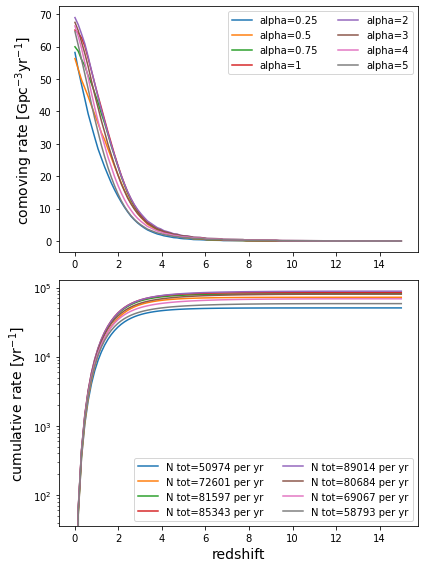

In [3]:
zbins = np.linspace(0, 15, 100)
models=['alpha_0.25', 'alpha_0.5', 'alpha_0.75', 
        'alpha_1', 'alpha_2', 
        'alpha_3', 'alpha_4', 'alpha_5']

fig = plt.figure(figsize=(6,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
rate_list = []
for alpha in [0.25,0.5,0.75,1,2,3,4,5]:
    merger_set = pd.read_hdf('all_mergers_weighted_alpha_{}.h5'.format(alpha), key='mergers')
    merger_set['z_digits'] = np.digitize(merger_set['z_merge'], zbins)
    merger_rate = merger_set.groupby('z_digits').sum()['weights']
    if len(merger_rate) == 99:
        ax1.plot(zbins[1:], merger_rate, label='alpha={}'.format(alpha))
        cumulative_rate = np.cumsum(merger_rate * cosmo.comoving_volume(zbins[1:]).to(u.Gpc**(3)).value * 1/(1+zbins[1:]))
        rate_data = np.vstack([zbins[1:], cumulative_rate]).T
        ax2.plot(zbins[1:], cumulative_rate,
             label='N tot={} per yr'.format(int(np.max(cumulative_rate))))
    else:
        ax1.plot(zbins, merger_rate, label='alpha={}'.format(alpha))
        cumulative_rate = np.cumsum(merger_rate * cosmo.comoving_volume(zbins).to(u.Gpc**(3)).value * 1/(1+zbins))
        rate_data = np.vstack([zbins, cumulative_rate]).T
        ax2.plot(zbins, cumulative_rate,
             label='N tot={} per yr'.format(int(np.max(cumulative_rate))))
    np.save('cumulative_rates_{}'.format(alpha), rate_data)
    rate_list.append(int(np.max(cumulative_rate)))
    
ax1.legend(ncol=2)
ax2.legend(ncol=2)
ax2.set_yscale('log')
ax2.set_ylabel(r'cumulative rate [yr$^{-1}$]', size=14)
ax1.set_ylabel(r'comoving rate [Gpc$^{-3}$yr$^{-1}$]', size=14)
ax2.set_xlabel('redshift', size=14)
plt.tight_layout()    
plt.savefig('cosmic_rates.pdf')

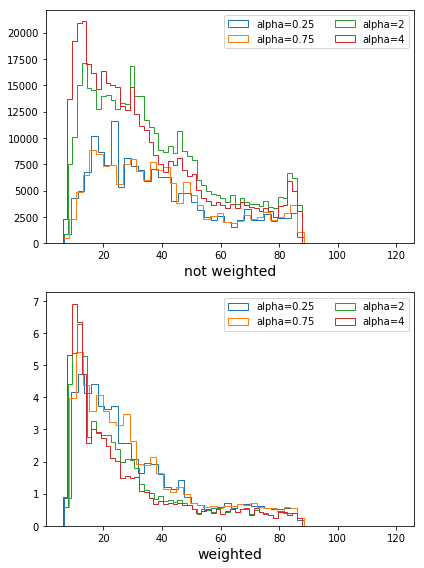

In [15]:
zbins = np.linspace(0, 15, 100)
models=['alpha_0.25', 'alpha_0.5', 'alpha_0.75', 
        'alpha_1', 'alpha_2', 
        'alpha_3', 'alpha_4', 'alpha_5']

fig = plt.figure(figsize=(6,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
rate_list = []
for alpha in [0.25,0.75,2,4]:
    merger_set = pd.read_hdf('all_mergers_weighted_alpha_{}.h5'.format(alpha), key='mergers')
    merger_set['z_digits'] = np.digitize(merger_set['z_merge'], zbins)
    merger_rate = merger_set.groupby('z_digits').sum()['weights']
    mergers_at_z_below_2 = merger_set.loc[merger_set.z_digits < 2]
    ax1.hist(mergers_at_z_below_2.mass_1, histtype='step', label='alpha={}'.format(alpha), bins=50)
    ax2.hist(mergers_at_z_below_2.mass_1, histtype='step', label='alpha={}'.format(alpha), weights=mergers_at_z_below_2.weights, bins=50)
ax1.legend(ncol=2)
ax2.legend(ncol=2)
#ax2.set_yscale('log')
#ax2.set_ylabel(r'cumulative rate [yr$^{-1}$]', size=14)
ax1.set_xlabel(r'not weighted', size=14)
ax2.set_xlabel('weighted', size=14)
plt.tight_layout()    
plt.savefig('cosmic_masses.pdf')